# Node identifier: Machine Learning approach

## Preparation

In [44]:
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [45]:
# Load train and test set
path = 'C:/Users/User/Desktop/Assignatures/Synthesis project/GraphAnomaly/dades_arnau/'

In [46]:
# Use balanced split
with open(path + 'balanced_train.pkl', 'rb') as f:
    train_set = pickle.load(f)
with open(path + 'balanced_test.pkl', 'rb') as f:
    test_set = pickle.load(f)

In [47]:
# Separate labels
train_set = train_set.loc[train_set['class'].isin([0, 1])] # Drop unknown
y_train = list(train_set['class'])
X_train = train_set.drop(columns=['class'])

test_set = test_set.loc[test_set['class'].isin([0, 1])] # Drop unknown
y_test = list(test_set['class'])
X_test = test_set.drop(columns=['class'])

## Models

In [64]:
def train_model(model):
    # Train
    model.fit(X_train, y_train)

    # Evaluate
    y_pred = model.predict(X_test)

    # Display results. Except for the accuracy, the others compute the metric for the ilicit class
    print(f"Testing {model}...\n")
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    precision = round(precision_score(y_test, y_pred, pos_label=0), 4)
    print("Precision: {:.2f}%".format(precision * 100))
    recall = round(recall_score(y_test, y_pred, pos_label=0), 4)
    print("Recall: {:.2f}%".format(recall * 100))
    f1 = round(f1_score(y_test, y_pred, pos_label=0),4)
    print("F1 Score: {:.2f}%".format(f1 * 100))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ilicit', 'Licit'])
    disp.plot()
    plt.title(model)
    plt.show()

Testing DecisionTreeClassifier()...

Accuracy: 96.32%
Precision: 91.14%
Recall: 90.66%
F1 Score: 90.90%


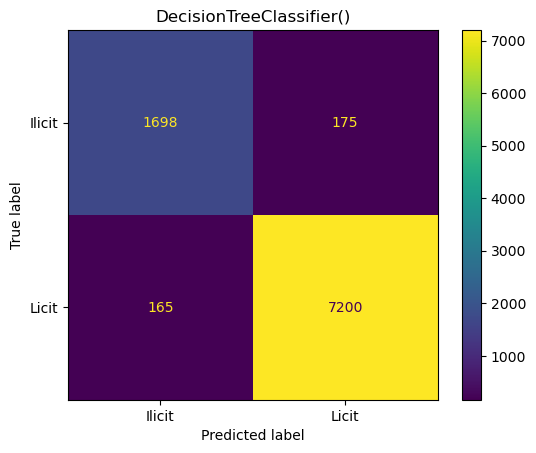

In [65]:
train_model(DecisionTreeClassifier())

Testing RandomForestClassifier()...

Accuracy: 98.32%
Precision: 99.42%
Recall: 92.26%
F1 Score: 95.71%


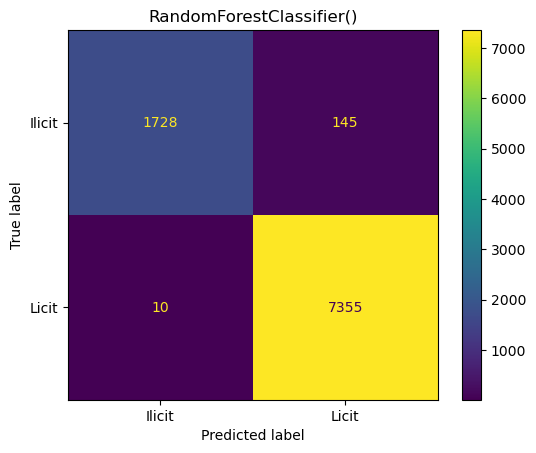

In [66]:
train_model(RandomForestClassifier())